<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/FEML-10-ensemble

## Ансамблирование

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [ ]:
!wget 'https://drive.google.com/uc?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH' -O train.csv

--2023-04-04 03:31:59--  https://drive.google.com/uc?id=1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH
Resolving drive.google.com (drive.google.com)... 74.125.134.139, 74.125.134.101, 74.125.134.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/grn3ee8792b48mrffk7v2bpegamaum9s/1680579075000/02611596255248067438/*/1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH?uuid=dccb670b-dc5e-4010-b201-3bba8ce3d95e [following]
--2023-04-04 03:32:00--  https://doc-0o-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/grn3ee8792b48mrffk7v2bpegamaum9s/1680579075000/02611596255248067438/*/1UyGD0iuIsO0Q7mBn8YY6lSuCc8r5MGzH?uuid=dccb670b-dc5e-4010-b201-3bba8ce3d95e
Resolving doc-0o-84-docs.googleusercontent.com (doc-0o-84-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Разделяем на тренировочные и тестовые данные

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'),
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [ ]:
# Находим категориальные признаки

categorials = X_train.select_dtypes('object').columns
categorials

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
X_train[categorials] = X_train[categorials].fillna('nan')
X_test[categorials] = X_test[categorials].fillna('nan')

In [ ]:
# отфильтруем непрерывные признаки
integer = X_train.select_dtypes(['int', 'float']).columns.tolist()
integer.remove('Id')
X_train[integer].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
135,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,530,98,0,0,0,0,0,0,5,2008
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,525,0,28,0,0,0,0,0,5,2006
762,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,614,169,45,0,0,0,0,0,6,2010
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,788,0,191,0,0,0,0,0,3,2007
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,550,158,61,0,0,0,0,0,4,2009


In [ ]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([X_test[integer].fillna(-999), dummy_test], axis=1)

In [ ]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterCond_TA,BsmtCond_TA,Exterior2nd_Stone,GarageType_nan,GarageQual_nan,Exterior2nd_AsphShn,Functional_Typ,FireplaceQu_nan,LotShape_Reg,SaleType_ConLw
135,20,80.0,10400,7,6,1970,1970,288.0,0,0,...,1,1,0,0,0,0,1,0,1,0
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,1,1,0,0,0,0,1,1,1,0
762,60,72.0,8640,7,5,2009,2009,0.0,24,0,...,1,1,0,0,0,0,1,1,1,0
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,1,0,0,0,0,0,1,0,0,0
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,1,1,0,0,0,0,1,0,0,1


## Бэггинг

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [ ]:
dt.score(X_test, y_test)

0.7549882674731216

In [ ]:
bagging = BaggingRegressor(DecisionTreeRegressor(),
                           n_estimators=150,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [ ]:
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=150, random_state=10)

In [ ]:
bagging.score(X_train, y_train)

0.9373722747085429

In [ ]:
bagging.score(X_test, y_test)

0.8858540025333806

In [ ]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.7501837788800589

In [ ]:
kn.score(X_test, y_test)

0.676138613361793

In [ ]:
bagging = BaggingRegressor(KNeighborsRegressor(),
                           n_estimators=100,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [ ]:
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=100, random_state=10)

In [ ]:
bagging.score(X_train, y_train)

0.7465006963887721

In [ ]:
bagging.score(X_test, y_test)

0.7189451729956573

### RandomForest

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Создаем модель RandomForest
clf_rf = RandomForestRegressor(random_state=10)
clf_rf.fit(X_train, y_train)

CPU times: user 3.71 s, sys: 46.6 ms, total: 3.75 s
Wall time: 6.83 s


RandomForestRegressor(random_state=10)

In [ ]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

0.978184889871636

In [ ]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

0.8950688572441701

In [ ]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

In [ ]:
imp = imp.sort_values(ascending=False)
imp

OverallQual          5.394457e-01
GrLivArea            1.237455e-01
2ndFlrSF             4.091540e-02
TotalBsmtSF          2.878837e-02
BsmtFinSF1           2.227699e-02
                         ...     
Exterior1st_Stone    2.019394e-07
Foundation_Stone     3.428709e-08
GarageQual_Po        1.212426e-08
ExterCond_Ex         0.000000e+00
PoolQC_Fa            0.000000e+00
Length: 269, dtype: float64

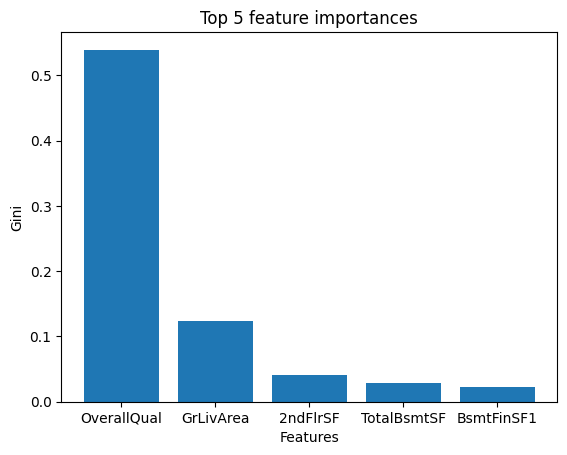

In [ ]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

## Стекинг

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [ ]:
# Создаем стэккинг и обучаем его на наших данных 

lr = LinearRegression()
Regressor = StackingRegressor(
    [ 
        ('LinearRegression', lr),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor()),
    ], RidgeCV([8, 14, 10]))

In [ ]:
%%time
Regressor.fit(X_train, y_train)

CPU times: user 1.05 s, sys: 574 ms, total: 1.63 s
Wall time: 1.52 s


StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=[8, 14, 10]))

In [ ]:
Regressor.final_estimator_.alpha_

14

In [ ]:
print(f'Score on train  {Regressor.score(X_train, y_train)}')
print(f'Score on test  {Regressor.score(X_test, y_test)}')

Score on train  0.9604984586951066
Score on test  0.8615239778346009


In [ ]:
for i in Regressor.named_estimators:
    print(f'Score on train  with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model LinearRegression 0.9324813510011758
Score on test  with model LinearRegression 0.80895792181671
Score on train  with model KNeighborsRegressor 0.7501837788800589
Score on test  with model KNeighborsRegressor 0.676138613361793
Score on train  with model DecisionTree 1.0
Score on test  with model DecisionTree 0.7384847523894024


Лучше всех справилась Линейная регрессия.
Деревья решений, как и предполагалось, переобучилась. Алгоритм ближайшего соседа тоже не плохо справилась с задачей. 

## Бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(n_estimators=100,
                                     random_state=10)

In [ ]:
%%time
boosting.fit(X_train, y_train)

CPU times: user 1.27 s, sys: 4.24 ms, total: 1.27 s
Wall time: 2.2 s


GradientBoostingRegressor(random_state=10)

In [ ]:
boosting.score(X_train, y_train)

0.9715180667981475

In [ ]:
boosting.score(X_test, y_test)

0.9097528185398203

### lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor(random_state=10)

In [ ]:
%%time
lgbm.fit(X_train, y_train)

CPU times: user 939 ms, sys: 16.6 ms, total: 955 ms
Wall time: 921 ms


LGBMRegressor(random_state=10)

In [ ]:
lgbm.score(X_train, y_train)

0.9763722880428561

In [ ]:
lgbm.score(X_test, y_test)

0.902080756223816

### xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(random_state=10)

In [ ]:
%%time
xgb.fit(X_train, y_train)

CPU times: user 6.44 s, sys: 61.2 ms, total: 6.5 s
Wall time: 7.81 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)

In [ ]:
xgb.score(X_train, y_train)

0.9998573389871543

In [ ]:
xgb.score(X_test, y_test)

0.8966466673418413

### catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor 

In [ ]:
cat = CatBoostRegressor(random_state=10)

In [ ]:
%%time
cat.fit(X_train, y_train)

Learning rate set to 0.041084
0:	learn: 75620.2545406	total: 54.2ms	remaining: 54.2s
1:	learn: 73762.7085582	total: 60.5ms	remaining: 30.2s
2:	learn: 71859.1942393	total: 66.8ms	remaining: 22.2s
3:	learn: 70211.6187196	total: 73ms	remaining: 18.2s
4:	learn: 68480.4206950	total: 78.9ms	remaining: 15.7s
5:	learn: 67031.7798022	total: 85ms	remaining: 14.1s
6:	learn: 65388.5038438	total: 91.2ms	remaining: 12.9s
7:	learn: 63841.6062194	total: 97.6ms	remaining: 12.1s
8:	learn: 62538.2937587	total: 104ms	remaining: 11.5s
9:	learn: 61209.8419681	total: 110ms	remaining: 10.9s
10:	learn: 59951.7194194	total: 116ms	remaining: 10.5s
11:	learn: 58739.3590530	total: 122ms	remaining: 10.1s
12:	learn: 57707.2769987	total: 128ms	remaining: 9.74s
13:	learn: 56559.4366234	total: 135ms	remaining: 9.48s
14:	learn: 55430.7958358	total: 141ms	remaining: 9.23s
15:	learn: 54226.3890490	total: 147ms	remaining: 9.04s
16:	learn: 53123.8574427	total: 153ms	remaining: 8.84s
17:	learn: 52155.7289705	total: 159ms	rem

In [ ]:
cat.score(X_train, y_train)

0.9956796814972898

In [ ]:
cat.score(X_test, y_test)

0.9219002043542658

# Дополнительные материалы:
1. Ансамбли в машинном обучении - https://dyakonov.org/2019/04/19/%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8/
2. Ансамблевые методы: бэггинг, бустинг и стекинг - https://neurohive.io/ru/osnovy-data-science/ansamblevye-metody-begging-busting-i-steking/
3. Бэггинг и бутстрап + композиции в целом - https://habr.com/ru/company/ods/blog/324402/
4. Бэггинг и случайный лес - https://youtu.be/rawnIo_XtYY
5. Бустинг - https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d
6. CatBoost против Light GBM против XGBoost - https://machinelearningmastery.ru/catboost-vs-light-gbm-vs-xgboost-5f93620723db/
